<a href="https://colab.research.google.com/github/Yathi2401/AI-ML-Projects/blob/main/ann-mobile-price-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(2000, 21)
[1 0]
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5578 - loss: 0.7037 - val_accuracy: 0.5133 - val_loss: 0.7100
Epoch 2/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5964 - loss: 0.6714 - val_accuracy: 0.6000 - val_loss: 0.6790
Epoch 3/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 0.6636 - val_accuracy: 0.6267 - val_loss: 0.6566
Epoch 4/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6187 - loss: 0.6306 - val_accuracy: 0.6333 - val_loss: 0.6410
Epoch 5/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6254 - loss: 0.6316 - val_accuracy: 0.6467 - val_loss: 0.6288
Epoch 6/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6538 - loss: 0.6119 - val_accuracy: 0.6533 - val_loss: 0.6210
Epoch 7/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6691 - loss: 0.5971 - val_accuracy: 0.6667 - val_loss: 0.6120
Epoch 8/200
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.5741 - val_accuracy: 0.6667 - val_loss: 0.6

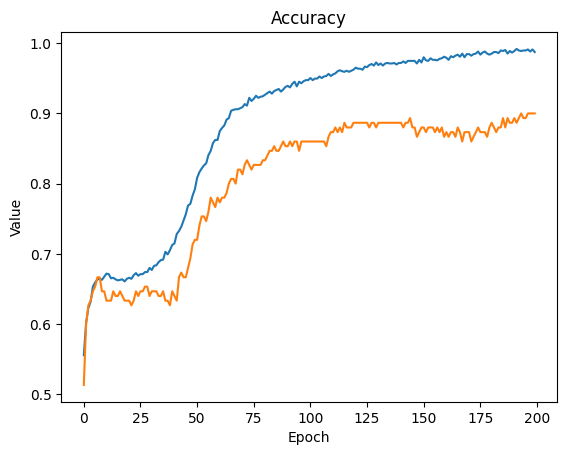

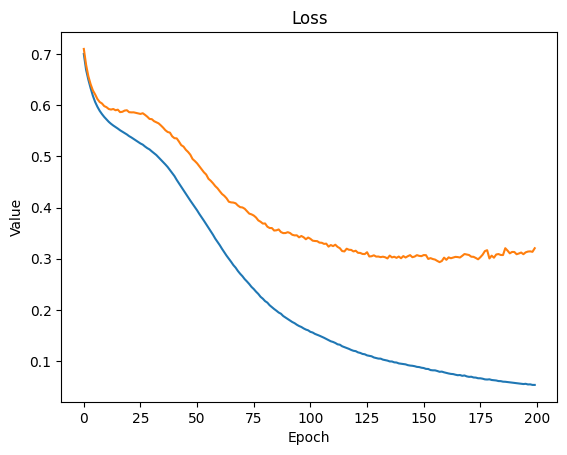

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# ANN for Mobile Price Classification

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load csv file
df = pd.read_csv("/content/drive/MyDrive/AI ML Datasets/Mobile_Price_Classification-220531-204702.csv")
print(df.shape)
print(df["price_range"].unique())

# input and output
X = df.drop("price_range", axis=1)
y = df["price_range"]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42,stratify=y)
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN model
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(8, activation="relu", input_shape=(n_features,)))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# train model
history = model.fit(X_train,y_train,epochs=200,batch_size=16,validation_split=0.1)

# test accuracy
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)
print("Loss:", loss)

# save trained weights
model.save_weights("ann.weights.h5")

# accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

# loss graph
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

# download weights (colab)
from google.colab import files
files.download("ann.weights.h5")
